In [10]:
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.layers import Dense, Flatten 
from tensorflow.keras import Model
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers.experimental import RandomFourierFeatures
import datetime
from google.colab import drive
import pathlib

2.4.1


In [11]:
mnist = tf.keras.datasets.mnist
(x_train, y_train_dense), (x_test, y_test_dense) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# truncate the dataset to reduce computational cost
x_train, y_train_dense = x_train[:4000,:], y_train_dense[:4000]
x_test, y_test_dense = x_test[:4000,:], y_test_dense[:4000]

# flatten inputs and convert label to one-hot
x_train = tf.reshape(x_train, (x_train.shape[0], -1))
x_test = tf.reshape(x_test, (x_test.shape[0], -1))
y_train, y_test = tf.one_hot(y_train_dense, 10), tf.one_hot(y_test_dense, 10)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(4000, 784) (4000, 784)
(4000, 10) (4000, 10)


In [12]:
# A plotting function you can reuse
def plot(history, title_prefix):
  
  # The history object contains results on the training and test
  # sets for each epoch
  acc = history.history['categorical_accuracy']
  val_acc = history.history['val_categorical_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  # Get the number of epochs
  epochs = range(len(acc))

  plt.title(title_prefix+' Training and validation accuracy')
  plt.plot(epochs, acc, color='blue', label='Train')
  plt.plot(epochs, val_acc, color='orange', label='Val')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

In [14]:
# drive.mount("/content/drive")
# # mount drive and load paths
# logpath = pathlib.Path("/content/drive/My Drive/MDL_logs")

In [ ]:
# %%capture cap --no-stderr
# start_time = str(datetime.datetime.now())
# filename = pathlib.Path.joinpath(logpath,'output_%s.txt' %start_time)

history_logs = []    
for N in [2, 5, 10, 25, 50, 100, 200, 300, 400, 500] + list(map(lambda x:1000*x,range(1,11))):
  print('='*80)
  print('%d RFF FEATURES' %N) 
  print('='*80)
  # https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/RandomFourierFeatures
  model = tf.keras.Sequential([
    tf.keras.Input(shape=(784,)),
    RandomFourierFeatures(
        output_dim=N,
        scale=10.,
        kernel_initializer='gaussian'),
    tf.keras.layers.Dense(units=10, activation='softmax'),
  ])
  model.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy']
  )

  history = model.fit(x_train, y_train, epochs=400, validation_data=(x_test, y_test), verbose=0)

  history_logs.append((N, history))
  print(tf.math.confusion_matrix(y_test_dense, tf.argmax(model.predict(x_test), axis=1)))
  model.summary()
  print('max training accuracy', max(history.history['accuracy']))
  print('min training loss', min(history.history['loss']))
  print('max validation accuracy', max(history.history['val_accuracy']))
  print('min validation loss', min(history.history['val_loss']))
  print()
  print('last training accuracy', history.history['accuracy'][-1])
  print('last training loss', history.history['loss'][-1])
  print('last validation accuracy', history.history['val_accuracy'][-1])
  print('last validation loss', history.history['val_loss'][-1])

# plot errors over number of parameters
plt.title('Training and validation error')
plt.plot([i[0] for i in history_logs], [1-i[1].history['val_accuracy'][-1] for i in history_logs], color='blue', label='val_error')
plt.plot([i[0] for i in history_logs], [1-i[1].history['accuracy'][-1] for i in history_logs], color='orange', label='training error')
plt.xlabel('Number of random fourier features')
plt.ylabel('Error')
plt.legend()

# # log outputs in file
# with open(filename, 'w') as f:
#   f.write(cap.stdout)

2 RFF FEATURES


In [ ]:
!ls /content/drive/My\ Drive/MDL_logs

'output_2021-03-24 02:05:04.018787.txt'
'output_2021-03-24 02:05:41.375281.txt'


2 RFF FEATURES
tf.Tensor(
[[ 92  31  25  19   0   2   0  18   4   0]
 [  5 165  15   0   0   6   0  28   1   0]
 [ 48  40  29  47   0   6   0  22   5   1]
 [ 28  32  26  81   0   5   0  18   1   0]
 [ 21 130  17  13   0   6   0  25   2   0]
 [ 11  90  14  37   0   9   0  19   0   0]
 [  9 140   8   9   0   6   0  26   1   1]
 [ 17 128  31  13   0   8   0  25   1   1]
 [ 40  58  18  20   0   9   0  27   0   0]
 [ 19 138  11   7   0   4   0  30   0   1]], shape=(10, 10), dtype=int32)
Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_fourier_features_21 ( (None, 2)                 1571      
_________________________________________________________________
dense_21 (Dense)             (None, 10)                30        
Total params: 1,601
Trainable params: 30
Non-trainable params: 1,571
_________________________________________________________________
max training accuracy 0.2

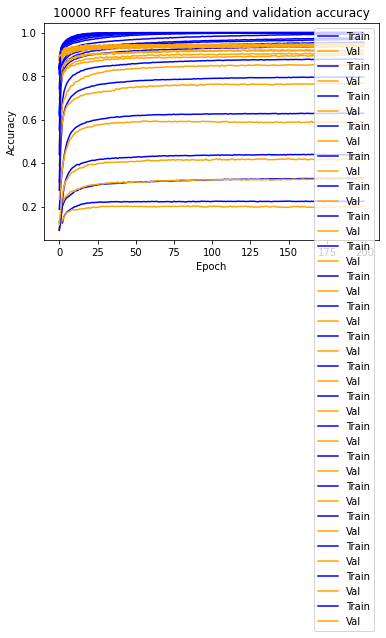

In [ ]:
# %%capture cap --no-stderr
# start_time = str(datetime.datetime.now())
# filename = pathlib.Path.joinpath(logpath,'output_%s.txt' %start_time)
    
for N in [2, 5, 10, 25, 50, 100, 200, 300, 400, 500] + list(map(lambda x:1000*x,range(1,11))):
  print('='*80)
  print('%d RFF FEATURES' %N) 
  print('='*80)
  # https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/RandomFourierFeatures
  model = tf.keras.Sequential([
    tf.keras.Input(shape=(784,)),
    RandomFourierFeatures(
        output_dim=N,
        scale=10.,
        kernel_initializer='gaussian'),
    tf.keras.layers.Dense(units=10, activation='softmax'),
  ])
  model.compile(
      optimizer='sgd',
      loss='categorical_crossentropy',
      metrics=['categorical_accuracy']
  )

  history = model.fit(x_train, y_train, epochs=200, validation_data=(x_test, y_test), verbose=0)

  plot(history, '%d RFF features' %N)
  print(tf.math.confusion_matrix(y_test_dense, tf.argmax(model.predict(x_test), axis=1)))
  model.summary()
  print('max training accuracy', max(history.history['categorical_accuracy']))
  print('min training loss', min(history.history['loss']))
  print('max validation accuracy', max(history.history['val_categorical_accuracy']))
  print('min validation loss', min(history.history['val_loss']))
  
# # log outputs in file
# with open(filename, 'w') as f:
#   f.write(cap.stdout)

2 RFF FEATURES
tf.Tensor(
[[ 72   9  28   0   0   0   0  12   0  70]
 [ 26 114  27   0   0   0   2   9   0  42]
 [ 15  38  92   0   0   0   1  24   0  28]
 [ 56  30  52   0   0   0   0  18   0  35]
 [ 47  47  44   0   0   0   0  24   0  52]
 [ 52  43  27   0   0   0   3  14   0  41]
 [ 62  27  39   0   0   0   2  11   0  59]
 [ 45  30  36   0   0   0   1  31   0  81]
 [ 26  25  60   0   0   0   0  14   0  47]
 [ 34  23  30   0   0   0   1  28   0  94]], shape=(10, 10), dtype=int32)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_fourier_features_1 (R (None, 2)                 1571      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                30        
Total params: 1,601
Trainable params: 30
Non-trainable params: 1,571
_________________________________________________________________
max training accuracy 0.20

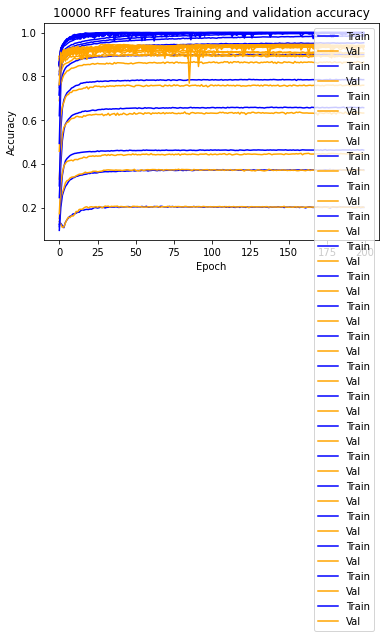

In [ ]:
# %%capture cap --no-stderr
# start_time = str(datetime.datetime.now())
# filename = pathlib.Path.joinpath(logpath,'output_%s.txt' %start_time)
    
for N in [2, 5, 10, 25, 50, 100, 200, 300, 400, 500] + list(map(lambda x:1000*x,range(1,11))):
  print('='*80)
  print('%d RFF FEATURES' %N) 
  print('='*80)
  # https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/RandomFourierFeatures
  model = tf.keras.Sequential([
    tf.keras.Input(shape=(784,)),
    RandomFourierFeatures(
        output_dim=N,
        scale=10.,
        kernel_initializer='gaussian'),
    tf.keras.layers.Dense(units=10, activation='softmax'),
  ])
  model.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['categorical_accuracy']
  )

  history = model.fit(x_train, y_train, epochs=200, validation_data=(x_test, y_test), verbose=0)

  plot(history, '%d RFF features' %N)
  print(tf.math.confusion_matrix(y_test_dense, tf.argmax(model.predict(x_test), axis=1)))
  model.summary()
  print('max training accuracy', max(history.history['categorical_accuracy']))
  print('min training loss', min(history.history['loss']))
  print('max validation accuracy', max(history.history['val_categorical_accuracy']))
  print('min validation loss', min(history.history['val_loss']))
  
# # log outputs in file
# with open(filename, 'w') as f:
#   f.write(cap.stdout)

2 RFF FEATURES
tf.Tensor(
[[109  18   5  41   0   0   0   2   2  14]
 [  0 139  22   5   2   0   1   2   2  47]
 [ 12  59  70  19   2   0   0   2  12  22]
 [ 32  23   3  48   2   0   2   6   9  66]
 [  2  59  25  25   4   0   2   5  10  82]
 [ 25  24   9  49   2   0   1   3   3  64]
 [  6  81  31  18   3   0   3   3   4  51]
 [  2  73  13  15   3   0   2   3   7 106]
 [ 15  47  62  11   1   0   1   3  10  22]
 [  8  32  22  47   5   0   0   3   9  84]], shape=(10, 10), dtype=int32)
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_fourier_features_19 ( (None, 2)                 1571      
_________________________________________________________________
dense_19 (Dense)             (None, 10)                30        
Total params: 1,601
Trainable params: 30
Non-trainable params: 1,571
_________________________________________________________________
max training accuracy 0.2

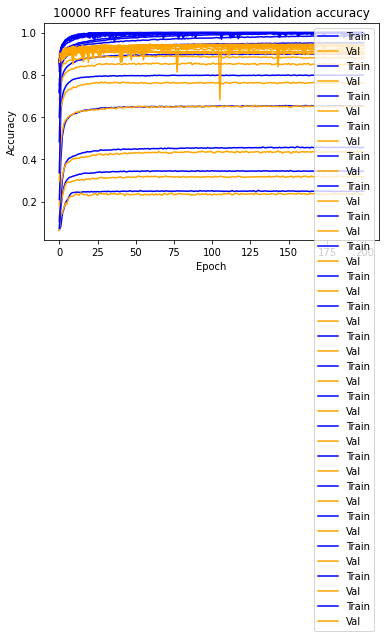

In [ ]:
# %%capture cap --no-stderr
# start_time = str(datetime.datetime.now())
# filename = pathlib.Path.joinpath(logpath,'output_%s.txt' %start_time)
    
for N in [2, 5, 10, 25, 50, 100, 200, 300, 400, 500] + list(map(lambda x:1000*x,range(1,11))):
  print('='*80)
  print('%d RFF FEATURES' %N) 
  print('='*80)
  # https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/RandomFourierFeatures
  model = tf.keras.Sequential([
    tf.keras.Input(shape=(784,)),
    RandomFourierFeatures(
        output_dim=N,
        scale=10.,
        kernel_initializer='gaussian'),
    tf.keras.layers.Dense(units=10, activation='softmax'),
  ])
  model.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['categorical_accuracy']
  )

  history = model.fit(x_train, y_train, epochs=200, validation_data=(x_test, y_test), verbose=0)

  plot(history, '%d RFF features' %N)
  print(tf.math.confusion_matrix(y_test_dense, tf.argmax(model.predict(x_test), axis=1)))
  model.summary()
  print('max training accuracy', max(history.history['categorical_accuracy']))
  print('min training loss', min(history.history['loss']))
  print('max validation accuracy', max(history.history['val_categorical_accuracy']))
  print('min validation loss', min(history.history['val_loss']))
  print()
  print('last training accuracy', history.history['categorical_accuracy'][-1])
  print('last training loss', history.history['loss'][-1])
  print('last validation accuracy', history.history['val_categorical_accuracy'][-1])
  print('last validation loss', history.history['val_loss'][-1])
  
# # log outputs in file
# with open(filename, 'w') as f:
#   f.write(cap.stdout)

In [ ]:
# %%capture cap --no-stderr
# start_time = str(datetime.datetime.now())
# filename = pathlib.Path.joinpath(logpath,'output_%s.txt' %start_time)
    
for N in [2, 5, 10, 25, 50, 100, 200, 300, 400, 500] + list(map(lambda x:1000*x,range(1,11))):
  print('='*80)
  print('%d RFF FEATURES' %N) 
  print('='*80)
  # https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/RandomFourierFeatures
  model = tf.keras.Sequential([
    tf.keras.Input(shape=(784,)),
    RandomFourierFeatures(
        output_dim=N,
        scale=10.,
        kernel_initializer='gaussian'),
    tf.keras.layers.Dense(units=10, activation='softmax'),
  ])
  model.compile( 
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy']
  )

  history = model.fit(x_train, y_train, epochs=200, validation_data=(x_test, y_test), verbose=0)

  plot(history, '%d RFF features' %N)
  print(tf.math.confusion_matrix(y_test_dense, tf.argmax(model.predict(x_test), axis=1)))
  model.summary()
  print('max training accuracy', max(history.history['accuracy']))
  print('min training loss', min(history.history['loss']))
  print('max validation accuracy', max(history.history['val_accuracy']))
  print('min validation loss', min(history.history['val_loss']))
  print()
  print('last training accuracy', history.history['accuracy'][-1])
  print('last training loss', history.history['loss'][-1])
  print('last validation accuracy', history.history['val_accuracy'][-1])
  print('last validation loss', history.history['val_loss'][-1])
  
# # log outputs in file
# with open(filename, 'w') as f:
#   f.write(cap.stdout)